# Customer Churn Classification Project 

**Overview:**
This project aims to analyze customer churn in a telecommunication company using classification models. We will explore and analyze the provided datasets to gain insights into factors influencing customer retention. The goal is to build machine learning models capable of predicting customer churn and offer valuable insights to the company for strategic decision-making.

**1.0 Business Understanding:**

   **1.1 Objective:**
   The main objective is to identify and understand factors influencing customer churn in the telecommunication industry. We aim to build effective classification models for predicting customer churn.  

**Features**
   - customerID -The unique id of each customer
   - gender -gender of the customer
   - SeniorCitizen -( age 50 and above)
   - Partner    -Whether the customer has a partner or not  
   - Dependents           
   - tenure              
   - PhoneService        
   - MultipleLines     
   - InternetService    
   - OnlineSecurity     
   - OnlineBackup       
   - DeviceProtection   
   - TechSupport        
   - StreamingTV        
   - StreamingMovies    
   - Contract           
   - PaperlessBilling     
   - PaymentMethod      
   - MonthlyCharges    
   - TotalCharges 
   - Churn     

**1.2 Hypothesis (Null and Alternate):**
   - Null Hypothesis (H0): There is no significant relationship between the Total Charges and customer churn.
   - Alternate Hypothesis (H1): There is a significant relationship between the Total Charges and customer churn.
   Ho : There seems to be no relationship between gender and whether the person is a senior citizen and the churn rate
   H1: There is a relationship between age and senior citizen and churn rate

   **1.3 Research/Analytical Questions:**
  
   - How do different services (PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, etc.) contribute to customer churn?
   - Is there any correlation between gender, age (SeniorCitizen), having a partner, having dependents, and customer churn?
   - How does the contract type (Contract) and billing preferences (PaperlessBilling, PaymentMethod) influence customer churn?
   - Is there a correlation between monthly charges (MonthlyCharges), total charges (TotalCharges), and customer churn?
   - What insights can be gained from the analysis to improve customer retention?
   - Is there a relationship between gender and the churn rate
   - How does internet service affect churn rate?
   - Are senior citizens more likely to churn


**2.0 Data Understanding:**
 
   **2.1 Importation:**
   Import necessary libraries and modules for data analysis and machine learning.

In [1]:
# Data manipulation packages
import pandas as pd
import numpy as np

#Data Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning Packages
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.preprocessing import OneHotEncoder , LabelEncoder , OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


# Database connection package
import pyodbc

# Ignore warnings (optional)
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# Loading environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Getting the values for the credentials set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")


connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"
conn = pyodbc.connect(connection_string)

**2.2 Loading of Dataset:**
   Load the data from the SQL Server database and OneDrive.

In [ ]:
query= "select * from dbo.LP2_Telco_churn_first_3000"

In [35]:
first_data = pd.read_csv('churn_data.csv')
first_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,NaN,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,NaN,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [34]:
url = 'https://github.com/Azubi-Africa/Career_Accelerator_LP2-Classifcation/raw/main/LP2_Telco-churn-second-2000.csv'

second_data= pd.read_csv(url)

second_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [36]:
# Merging two datasets
churn_data = pd.concat([first_data,second_data])

**2.3 EDA:**
   - Explore data (info, duplicated, null values, describe)

In [37]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   object 
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [38]:
churn_data.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [7]:
# checked for duplicated values
churn_data.duplicated().sum()

# there was no duplicated values

0

In [8]:
churn_data.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,5043.0,32.576641,24.529807,0.0,9.000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.4,35.775,70.550003,90.050003,118.650002


Key Insights:
- mean seems to be 
- The standard deviation

In [ ]:
churn_data.describe(include='object').T

Key Insights:
- Seems that the column 'Totalcharges' has a lot of outliers

**2.3.1 Univariate Analysis:**
     Explore individual variables for insights.

Univariate Analysis

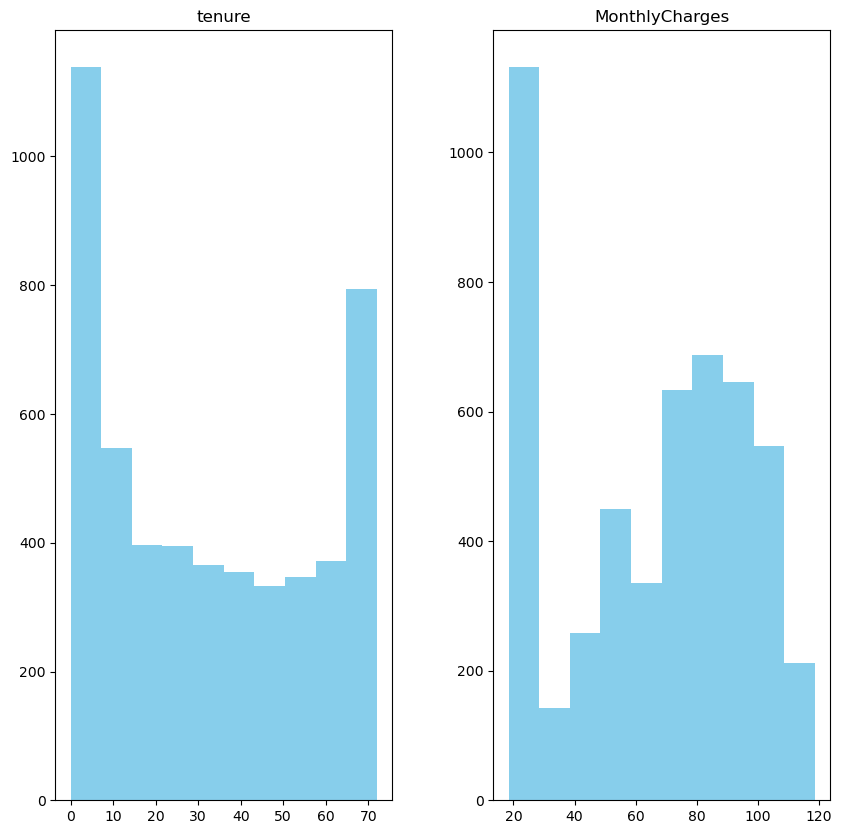

In [9]:
churn_data.hist(figsize=(10,10),grid=False,color = 'skyblue')
plt.show()

Key Insights:
- The distribution of the monthly charges seems to follow the bell curve of a normal distribution
- Total charges column is positively skewed

<Axes: ylabel='Density'>

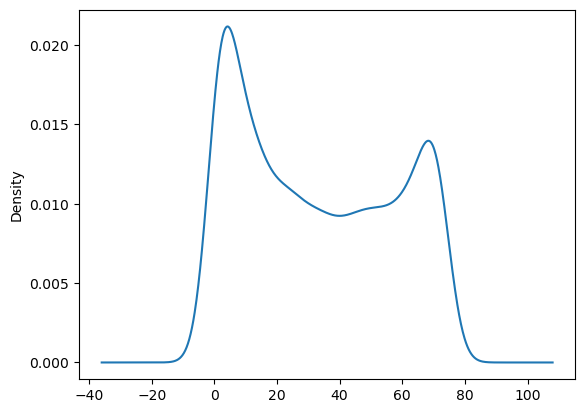

In [10]:
churn_data['tenure'].plot(kind= 'kde')

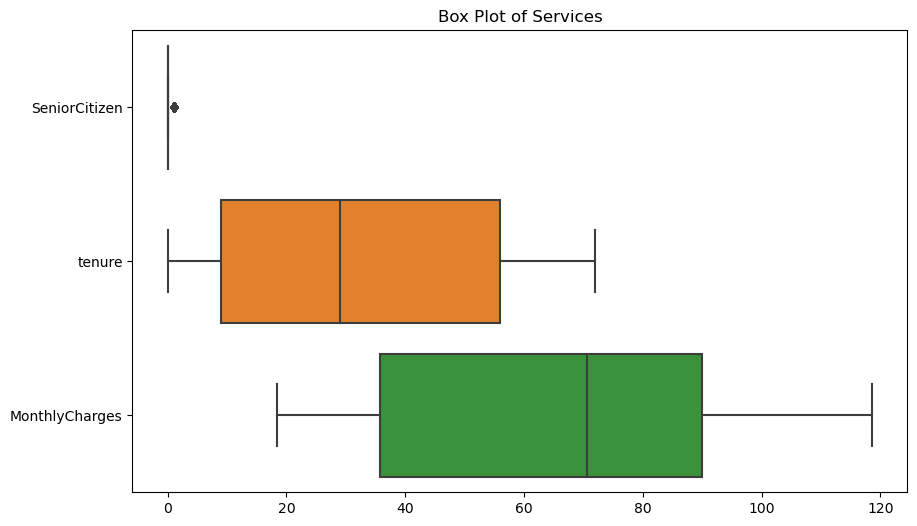

In [11]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=churn_data,orient='h')
plt.title('Box Plot of Services')
plt.show()

**2.3.2 Bivariate Analysis:**
     Investigate relationships between pairs of variables.

Bivariate Analysis

In [13]:
correlation = churn_data.corr(numeric_only=True)

correlation

,tenure,MonthlyCharges
tenure,1.000000,0.240645
MonthlyCharges,0.240645,1.000000


<Axes: >

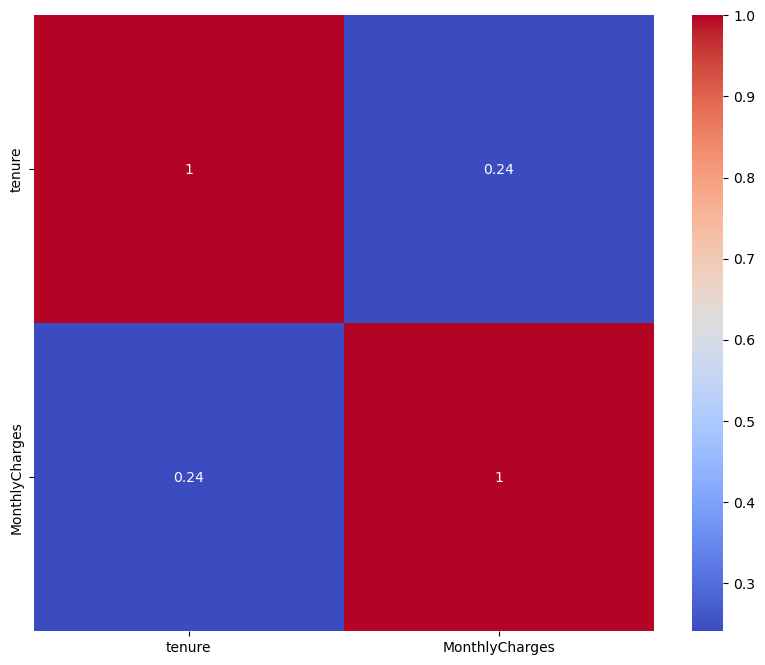

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(data = correlation,annot = True,cmap = 'coolwarm')

Key Insights: There seems not to be a strong correclation between the features

**2.3.3 Multivariate Analysis:**
     Examine interactions between three or more variables.

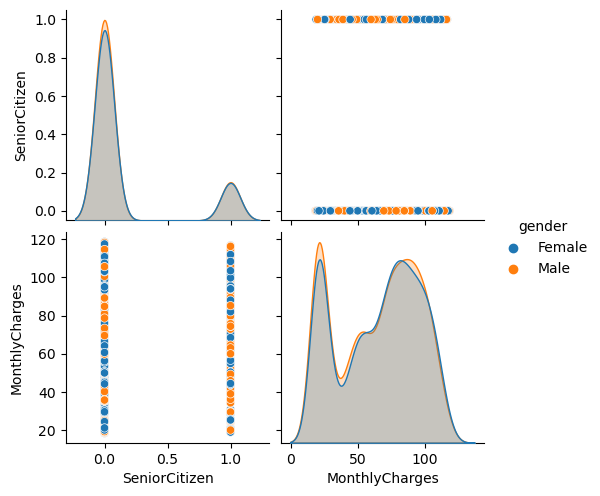

In [15]:
data = churn_data[['gender','SeniorCitizen','MonthlyCharges']]

sns.pairplot(data,hue='gender')

**2.4 Answering Analytical Questions:**
     Visualizations

Q1.How do different services (PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, etc.) contribute to customer churn?

In [16]:
churn_counts = churn_data.groupby(['InternetService', 'Churn']).size().unstack()
churn_counts

Churn,False,True,No,Yes
InternetService,,,,
DSL,835,171,571,138
Fiber optic,772,570,524,381
No,612,39,392,37


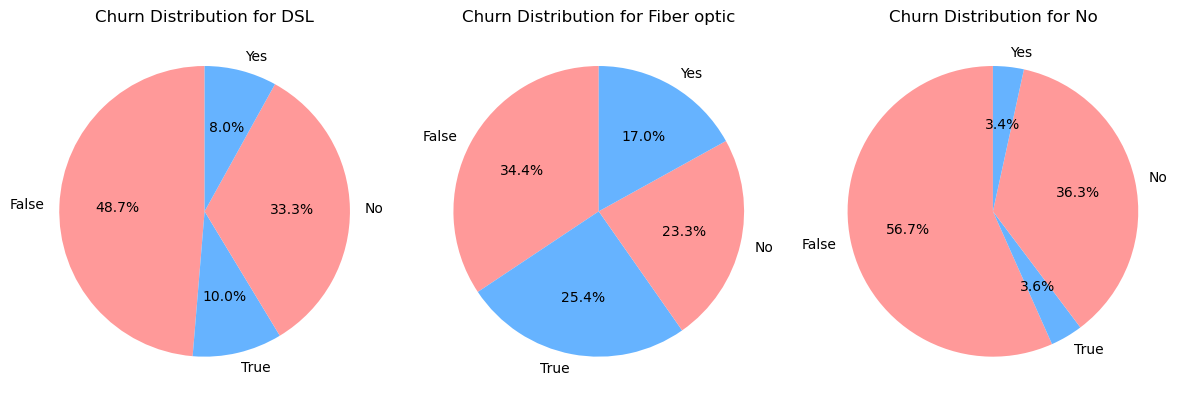

In [17]:
# Plot a pie chart for each internet service category
plt.figure(figsize=(12, 5))

for i, service_type in enumerate(churn_counts.index):
    plt.subplot(1, 3, i + 1)
    plt.pie(churn_counts.loc[service_type], labels=churn_counts.columns, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
    plt.title(f'Churn Distribution for {service_type}')

plt.tight_layout()
plt.show()

Key Insights and Recommendations
- Most of the customers who churned had not subscribed for any internet service:
We recommend that the company with marketing strategies that would attract more customers to subscribe for internet services

Q2.Is there any correlation between gender, age (SeniorCitizen), having a partner, having dependents, and customer churn?

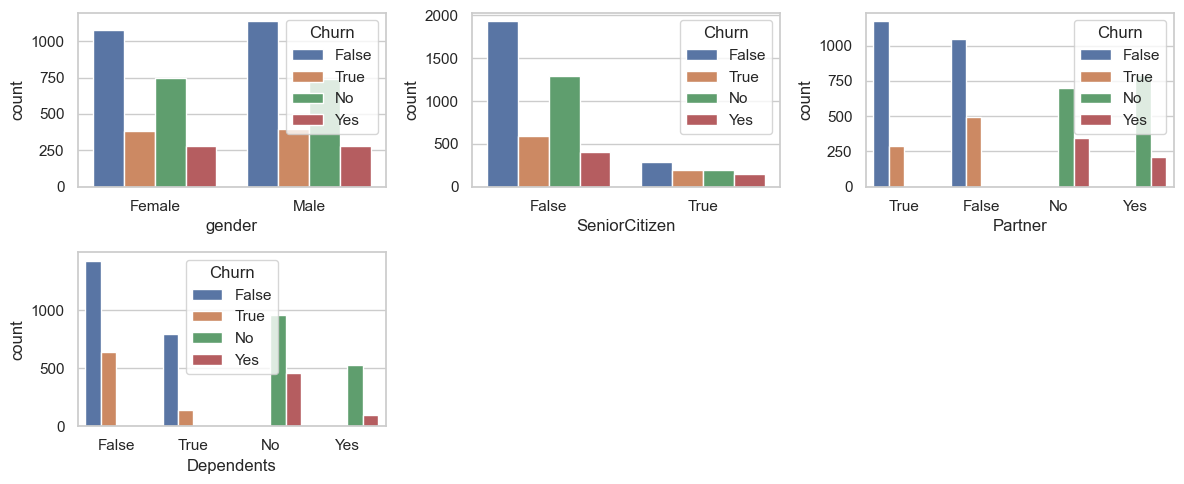

In [18]:
sns.set(style="whitegrid")

# Plotting gender distribution
plt.figure(figsize=(12, 5))
plt.subplot(2, 3, 1)
sns.countplot(x='gender', hue='Churn', data=churn_data)

# Plotting SeniorCitizen distribution
plt.subplot(2, 3, 2)
sns.countplot(x='SeniorCitizen', hue='Churn', data=churn_data)

# Plotting Partner distribution
plt.subplot(2, 3, 3)
sns.countplot(x='Partner', hue='Churn', data=churn_data)

# Plotting Dependents distribution
plt.subplot(2, 3, 4)
sns.countplot(x='Dependents', hue='Churn', data=churn_data)


# Adjust layout
plt.tight_layout()
plt.show()

Key Insights and Recommendations:
- The male gender is less likely to churn as compared to females
- Seniorcitizens are less likely to churn
- The customers with partners are more likely to churn than the customers without partners
- Customers with dependants are more likely to churn than the ones without

Q3 How does the contract type (Contract) and billing preferences (PaperlessBilling, PaymentMethod) influence customer churn?

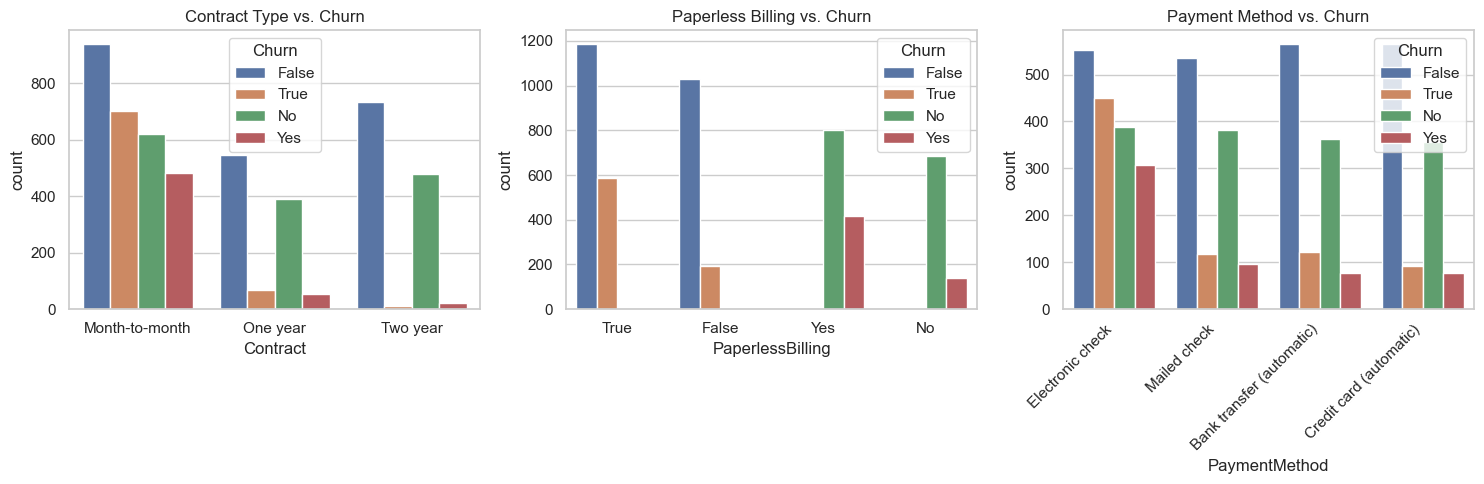

In [19]:
# Set the style of seaborn for better visualization
sns.set(style="whitegrid")

# Plotting contract type distribution
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(x='Contract', hue='Churn', data=churn_data)
plt.title('Contract Type vs. Churn')

# Plotting paperless billing distribution
plt.subplot(1, 3, 2)
sns.countplot(x='PaperlessBilling', hue='Churn', data=churn_data)
plt.title('Paperless Billing vs. Churn')

# Plotting payment method distribution
plt.subplot(1, 3, 3)
sns.countplot(x='PaymentMethod', hue='Churn', data=churn_data)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.title('Payment Method vs. Churn')

# Adjust layout
plt.tight_layout()
plt.show()


Key Insights and recommendations:
- Customers with month to month contract type are likely to churn as compared to customers with long term contracts of one year and above
- The company should consider giving incentives to long term contracts to attract more customers to subscribe

Q4. Is there a correlation between monthly charges (MonthlyCharges), total charges (TotalCharges), and customer churn?

Key Insights:
- The monthly charges seem to have a correlation with the totalcharges , they seem to have a positive correlation with churn rate

Q5. Is there a relationship between gender and the churn rate?

In [20]:
churn_data.groupby('gender')['Churn'].value_counts()

gender  Churn
Female  False    1079
        No        744
        True      384
        Yes       277
Male    False    1140
        No        743
        True      396
        Yes       279
Name: Churn, dtype: int64

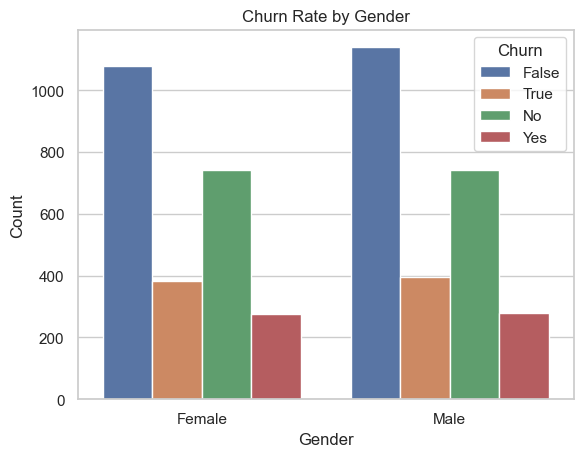

In [21]:
sns.countplot(x='gender', hue='Churn', data=churn_data)

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Churn Rate by Gender')

# Show the plot
plt.show()

Q6. How does internet service affect churn rate?

Text(0, 0.5, 'Count')

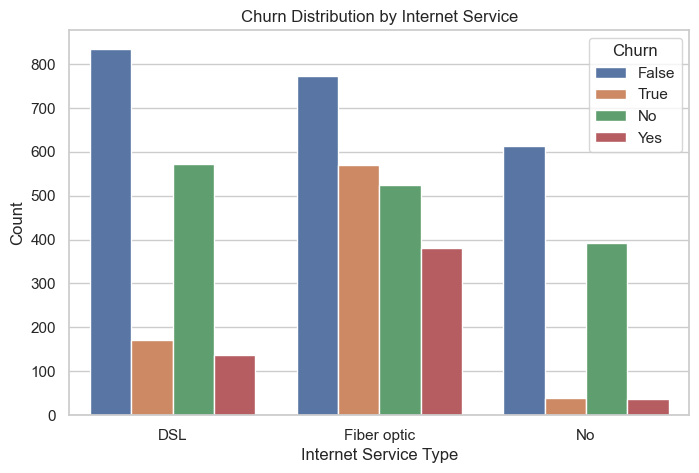

In [22]:
sns.set(style="whitegrid")

# Count plot for Churn based on InternetService
plt.figure(figsize=(8, 5))
sns.countplot(x='InternetService', hue='Churn', data=churn_data)
plt.title('Churn Distribution by Internet Service')
plt.xlabel('Internet Service Type')
plt.ylabel('Count')

Q7.Are senior citizens more likely to churn

Text(0, 0.5, 'Count')

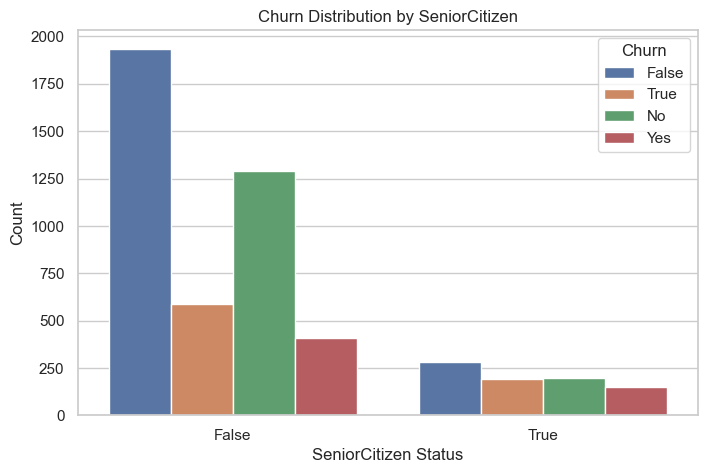

In [23]:
sns.set(style="whitegrid")

# Count plot for Churn based on SeniorCitizen status
plt.figure(figsize=(8, 5))
sns.countplot(x='SeniorCitizen', hue='Churn', data=churn_data)
plt.title('Churn Distribution by SeniorCitizen')
plt.xlabel('SeniorCitizen Status')
plt.ylabel('Count')

**2.5  Test Hypothesis:**
     

**2.6 Insights and Recommendations:**
     

## 3.0 Data Preparation

Data Cleaning- removing duplicates, handling missing values

In [24]:
# checking the dtypes of the data
churn_data.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [25]:
# checking the unique values in the total charges column
churn_data['TotalCharges'].unique()

array([29.850000381469727, 1889.5, 108.1500015258789, ..., '346.45',
       '306.6', '6844.5'], dtype=object)

In [ ]:
# removing all non numeric columns from TotalCharges column
churn_data['TotalCharges'] = pd.to_numeric(churn_data['TotalCharges'], errors='coerce')
churn_data['TotalCharges'] = churn_data['TotalCharges'].fillna(0)
churn_data['TotalCharges'] = churn_data['TotalCharges'].astype(float)

#### 3.1 Split data into input(X) and target(y) features

In [26]:
X = churn_data.drop('Churn',axis=1)

In [27]:
y = churn_data['Churn']

In [29]:
X = X.dropna()

In [30]:
y = y.dropna()

#### 3.2 Splitting data into training and evaluation

In [31]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=42,stratify=y)

ValueError: Found input variables with inconsistent numbers of samples: [4122, 5042]

#### 3.3 Feature Engineering

In [ ]:
X.info()

In [ ]:
numeric_cols = X.select_dtypes(include='number').columns

numeric_cols

In [ ]:
categorical_cols = X.select_dtypes(include='object').columns

categorical_cols

#### Pipeline

In [ ]:

class LogTransformer():
    def __init__(self,constant = 1e-5):
        self.constant = constant

    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        return np.log1p(X+self.constant)
        

numeric_pipeline = Pipeline(steps=[
    ('num_imputer',SimpleImputer(strategy='mean')),
    ('log_transformation',FunctionTransformer(LogTransformer().transform)),
    ('scaler ',RobustScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('cat_imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder()),
    (),
])

Preprocessor =ColumnTransformer([
    ('numerical_transformations',numeric_pipeline,numeric_cols),
    ('cat_transformations',categorical_pipeline,categorical_cols)

])

#### ML Pipeline

In [ ]:
decision_tree_classifier = DecisionTreeClassifier(random_state = 7)

decision_tree_classifier.fit(X_train,y_train)

In [ ]:
decision_tree_pipeline = Pipeline([
    ('preprocessor',Preprocessor),
    ('classifier',DecisionTreeClassifier)
])

decision_tree_pipeline.fit(X_train,y_train_encoded)